In [1]:
%run init_notebook.py

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import datetime as dt

import os

In [16]:
from settings import DATA_DIR, OUTPUT_DIR

In [4]:
data = pd.read_csv(os.path.join(DATA_DIR, "covid_data.csv"))
data = data[data["location"]=="Germany"]

In [5]:
data["active_corona"] = data["new_cases"].rolling(min_periods=1, window=14).sum()
data["active_corona_p"] = data["active_corona"] / 83240000
data["date"] = data["date"].apply(lambda x: dt.datetime.strptime(str(x), "%Y-%M-%d"))
data["year"] = data["date"].apply(lambda x: x.year)
data["month"] = data["date"].apply(lambda x: x.month)

In [6]:
data20 = data[data["year"] == 2020].copy().reset_index()
data21 = data[data["year"] == 2021].copy().reset_index()

In [8]:
data["active_corona_p"].describe().round(3)

count    665.000
mean       0.001
std        0.001
min        0.000
25%        0.000
50%        0.001
75%        0.002
max        0.007
Name: active_corona_p, dtype: float64

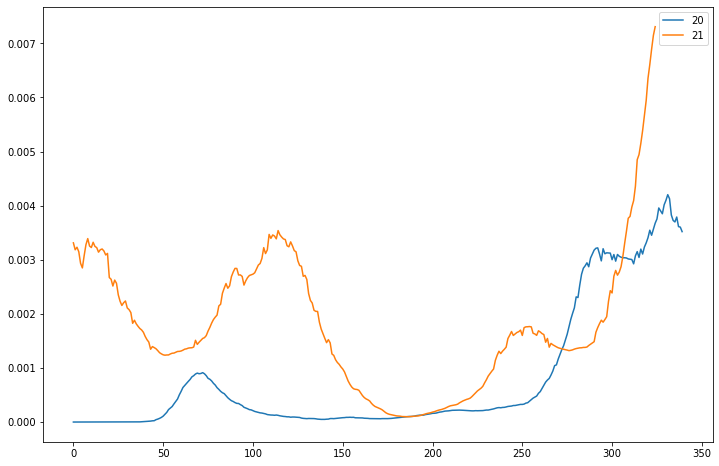

In [15]:
plt.figure(figsize=(12, 8))

plt.plot(data20["active_corona_p"])
plt.plot(data21["active_corona_p"])

plt.legend(["20", "21"])

In [37]:
_ = (data["active_corona_p"] * (data["active_corona_p"] > 0.00001 * 1)).replace({0: np.nan}).dropna().index

In [44]:
data = data.loc[_]

In [43]:
# data[["date", "total_cases", "new_cases", "active_corona", "active_corona_p"]].to_excel(os.path.join(OUTPUT_DIR, "corona_cases_risk.xlsx"))